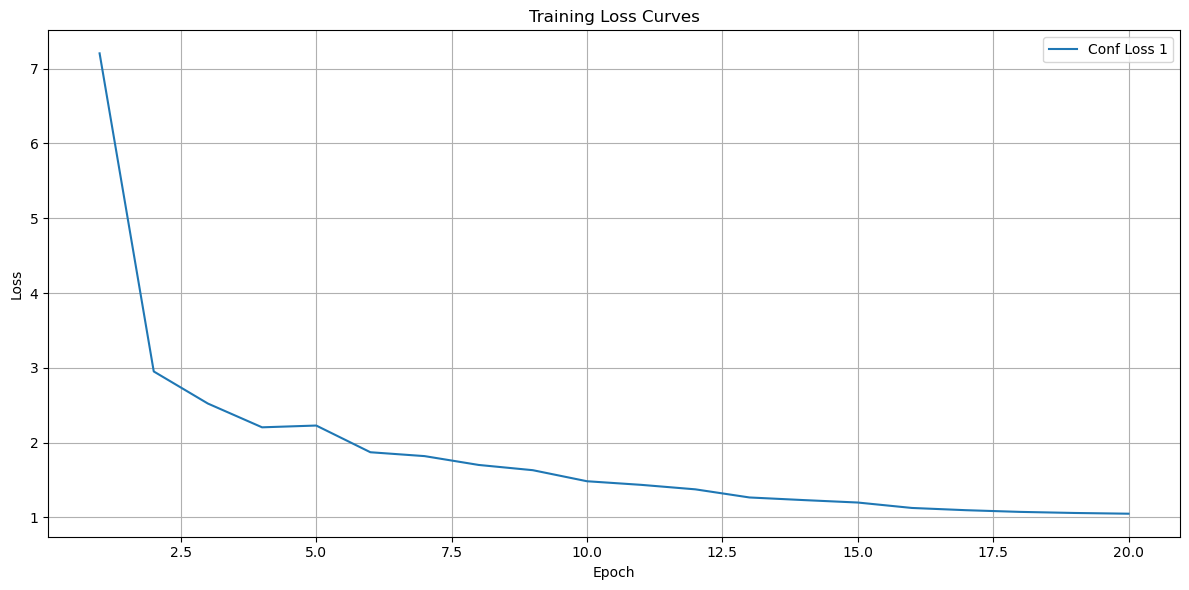

In [1]:
import json
import matplotlib.pyplot as plt

# Replace with your log file path
log_file = '/home/bjangley/VPR/mast3r-v2/checkpoints/campus_train0/log.txt'


# Prepare lists to store values
epochs = []
train_loss = []
train_conf_loss_1 = []
train_conf_loss2 = []
train_Regr3D_pts3d_1 = []
train_Regr3D_pts3d_2 = []

# Read the log file line by line
with open(log_file, 'r') as f:
    for line in f:
        line = line.strip()
        if not line or not line.startswith('{'):
            continue  # skip empty or non-JSON lines
        entry = json.loads(line)
        # Only process lines that have an epoch and loss value
        if 'epoch' in entry and 'train_loss' in entry:
            epochs.append(entry['epoch'])
            train_loss.append(entry.get('train_loss'))
            train_conf_loss_1.append(entry.get('train_conf_loss_1'))
            train_conf_loss2.append(entry.get('train_conf_loss2'))
            train_Regr3D_pts3d_1.append(entry.get('train_Regr3D_pts3d_1'))
            train_Regr3D_pts3d_2.append(entry.get('train_Regr3D_pts3d_2'))

# Plot the curves
plt.figure(figsize=(12, 6))
# plt.plot(epochs, train_loss, label='Total Loss')
plt.plot(epochs, train_conf_loss_1, label='Conf Loss 1')
# plt.plot(epochs, train_Regr3D_pts3d_1, label='Regr3D pts3d 1')
# plt.plot(epochs, train_conf_loss2, label='Conf Loss 2')
# plt.plot(epochs, train_Regr3D_pts3d_2, label='Regr3D pts3d 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [2]:
import json
import matplotlib.pyplot as plt



# Prepare lists to store values
epochs = []
train_loss = []
val_loss = []
train_Regr3D_pts3d_1 = []
val_Regr3D_pts3d_1 = []
train_conf_1 = []
val_conf_1 = []
with open(log_file, 'r') as f:
    for line in f:
        line = line.strip()
        if not line or not line.startswith('{'):
            continue
        entry = json.loads(line)
        if 'epoch' in entry and 'train_loss' in entry:
            epochs.append(entry['epoch'])
            train_loss.append(entry.get('train_loss'))
            train_Regr3D_pts3d_1.append(entry.get('train_Regr3D_pts3d_1'))
            train_conf_1.append(entry.get('train_conf_loss_1'))
            # Validation: use VBRPairsDataset_loss_avg and VBRPairsDataset_Regr3D_pts3d_1_avg
            val_loss.append(entry.get('VBRPairsDataset_loss_median'))
            val_conf_1.append(entry.get('VBRPairsDataset_conf_loss_1_med'))
            val_Regr3D_pts3d_1.append(entry.get('VBRPairsDataset_Regr3D_pts3d_1_med'))


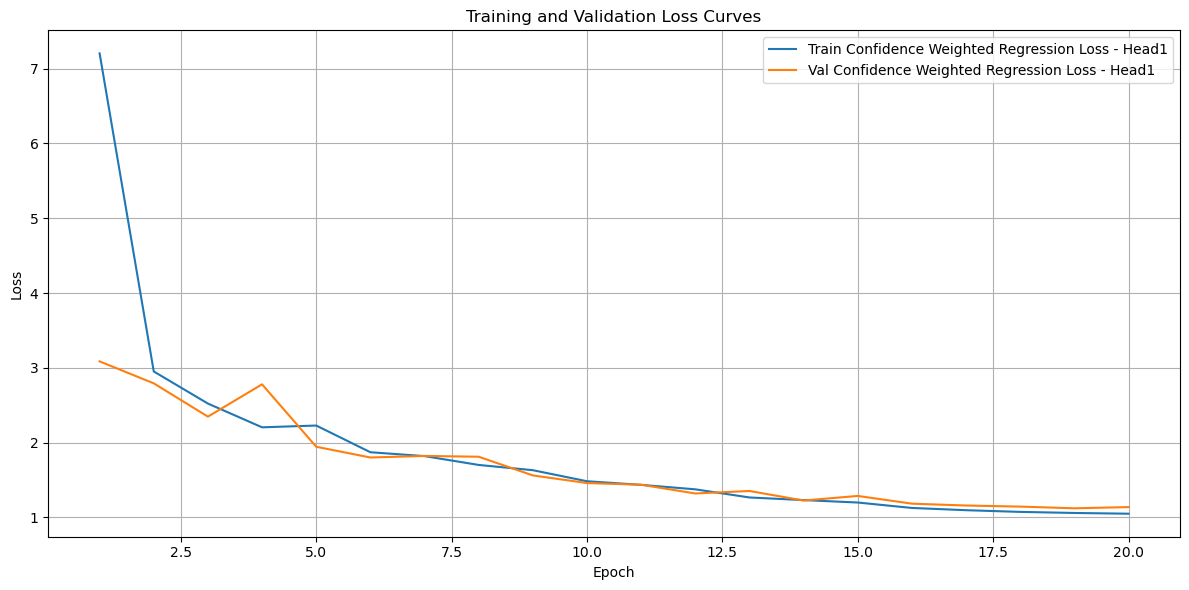

In [3]:
plt.figure(figsize=(12, 6))

plt.plot(epochs, train_conf_1, label='Train Confidence Weighted Regression Loss - Head1')
plt.plot(epochs, val_conf_1, label='Val Confidence Weighted Regression Loss - Head1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


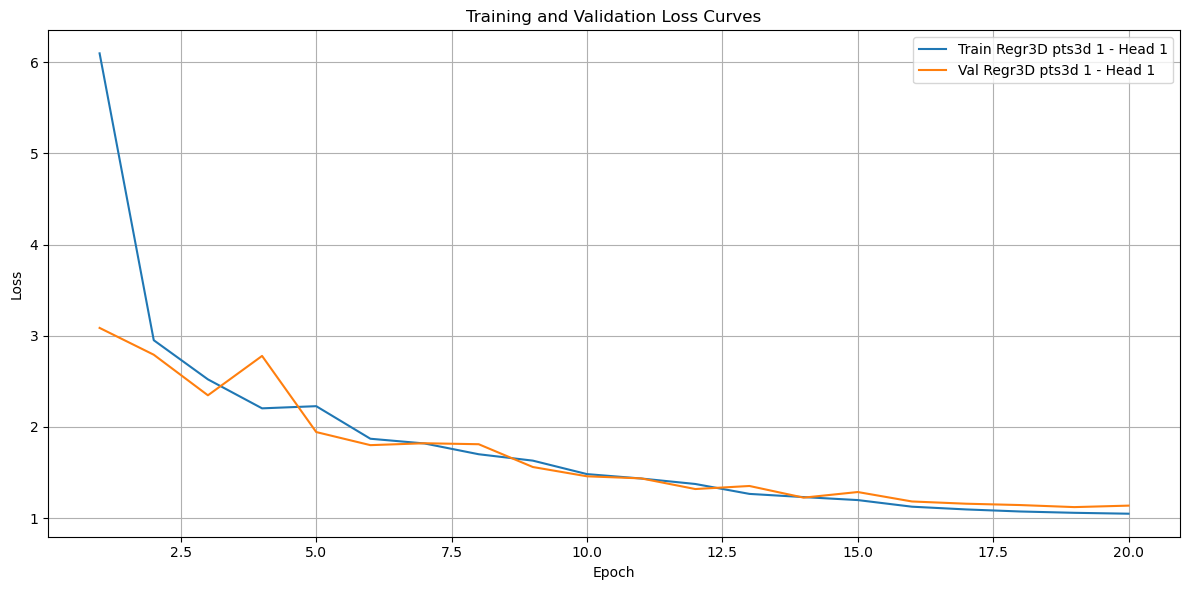

In [4]:
plt.figure(figsize=(12, 6))

plt.plot(epochs, train_Regr3D_pts3d_1, label='Train Regr3D pts3d 1 - Head 1')
plt.plot(epochs, val_Regr3D_pts3d_1, label='Val Regr3D pts3d 1 - Head 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
